# 1. Download Dataset
Data Source: https://advnet.seas.upenn.edu/#:~:text=AdvNet%20is%20a%20dataset%20of,without%20any%20stickers%20on%20them

In [ ]:
!pip install gdown

In [ ]:
import gdown

url = f"https://drive.google.com/uc?id=13NdhIvPgzOQoRg9A-xUUXSsfxVwPrEUV"
gdown.download(url, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=13NdhIvPgzOQoRg9A-xUUXSsfxVwPrEUV
From (redirected): https://drive.google.com/uc?id=13NdhIvPgzOQoRg9A-xUUXSsfxVwPrEUV&confirm=t&uuid=a369616f-3bbc-4556-867a-4884b46bfd9e
To: /content/LisaCnn.zip
100%|██████████| 6.47M/6.47M [00:00<00:00, 207MB/s]


'LisaCnn.zip'

# 2. Extract the Downloaded Dataset

In [ ]:
import zipfile
import os

zip_path = "/content/LisaCnn.zip"
extract_dir = "/content/LisaCnn"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("Extraction completed.")

Extraction completed.


# 3. Check Folder Structure

In [ ]:
for root, dirs, files in os.walk(extract_dir):
    print(root, ":", len(files), "files")

/content/LisaCnn : 0 files
/content/LisaCnn/LisaCnn : 0 files
/content/LisaCnn/LisaCnn/StopSigns : 0 files
/content/LisaCnn/LisaCnn/StopSigns/CleanStop : 902 files
/content/LisaCnn/LisaCnn/StopSigns/LisaAdvStop : 0 files
/content/LisaCnn/LisaCnn/StopSigns/LisaAdvStop/AdvStop : 964 files
/content/LisaCnn/LisaCnn/StopSigns/LisaAdvStop/__MACOSX : 1 files
/content/LisaCnn/LisaCnn/StopSigns/LisaAdvStop/__MACOSX/AdvStop : 964 files
/content/LisaCnn/LisaCnn/Speed35Signs : 1 files
/content/LisaCnn/LisaCnn/Speed35Signs/Clean : 815 files
/content/LisaCnn/LisaCnn/Speed35Signs/Adv : 1006 files
/content/LisaCnn/LisaCnn/YieldSigns : 1 files
/content/LisaCnn/LisaCnn/YieldSigns/CleanYield : 928 files
/content/LisaCnn/LisaCnn/YieldSigns/AdvYield : 1018 files


# 4. Organize the Dataset

In [ ]:
import shutil

# Paths
original_root = "/content/LisaCnn/LisaCnn"
clean_root = "/content/LisaCnn_Clean"
adv_root = "/content/LisaCnn_Adv"  # New folder for adversarial images

# Categories and their corresponding "clean" and "adversarial" folders
categories = {
    "Speed35Signs": ("Speed35Signs/Clean", "Speed35Signs/Adv"),
    "StopSigns": ("StopSigns/CleanStop", "StopSigns/LisaAdvStop/AdvStop"),
    "YieldSigns": ("YieldSigns/CleanYield", "YieldSigns/AdvYield")
}

# Create dataset structures
os.makedirs(clean_root, exist_ok=True)
os.makedirs(adv_root, exist_ok=True)

for category, (clean_folder, adv_folder) in categories.items():
    clean_source = os.path.join(original_root, clean_folder)
    adv_source = os.path.join(original_root, adv_folder)

    clean_target = os.path.join(clean_root, category)
    adv_target = os.path.join(adv_root, category)

    os.makedirs(clean_target, exist_ok=True)
    os.makedirs(adv_target, exist_ok=True)

    # Copy clean images
    for file in os.listdir(clean_source):
        file_path = os.path.join(clean_source, file)
        if os.path.isfile(file_path):
            shutil.copy(file_path, os.path.join(clean_target, file))

    # Copy adversarial images
    for file in os.listdir(adv_source):
        file_path = os.path.join(adv_source, file)
        if os.path.isfile(file_path):
            shutil.copy(file_path, os.path.join(adv_target, file))

print("Clean and adversarial datasets structured successfully.")

Clean and adversarial datasets structured successfully.


# 5. Analyze Image Sizes and Color Channels

Could not open /content/LisaCnn/LisaCnn/StopSigns/CleanStop/.DS_Store: cannot identify image file '/content/LisaCnn/LisaCnn/StopSigns/CleanStop/.DS_Store'
          Category  Width  Height Mode
0     Speed35Signs     32      32  RGB
1     Speed35Signs     32      32  RGB
2     Speed35Signs     32      32  RGB
3     Speed35Signs     32      32  RGB
4     Speed35Signs     32      32  RGB
...            ...    ...     ...  ...
2639    YieldSigns     32      32  RGB
2640    YieldSigns     32      32  RGB
2641    YieldSigns     32      32  RGB
2642    YieldSigns     32      32  RGB
2643    YieldSigns     32      32  RGB

[2644 rows x 4 columns]


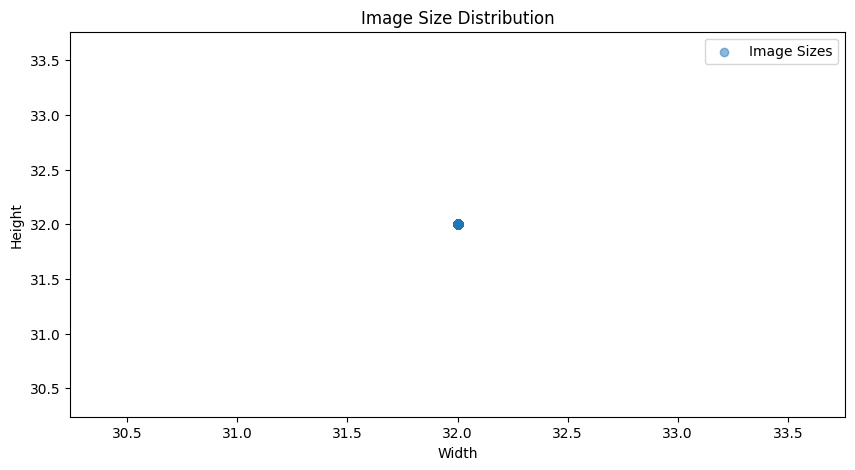

In [ ]:
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define dataset path
dataset_root = "/content/LisaCnn/LisaCnn"

# Clean image directories
clean_folders = {
    "Speed35Signs": "Speed35Signs/Clean",
    "StopSigns": "StopSigns/CleanStop",
    "YieldSigns": "YieldSigns/CleanYield"
}

# Store statistics
image_stats = []

# Analyze each category
for category, folder in clean_folders.items():
    folder_path = os.path.join(dataset_root, folder)
    if os.path.exists(folder_path):
        for image_name in os.listdir(folder_path):
            image_path = os.path.join(folder_path, image_name)
            try:
                with Image.open(image_path) as img:
                    width, height = img.size
                    mode = img.mode  # 'RGB', 'L' (grayscale), etc.
                    image_stats.append((category, width, height, mode))
            except Exception as e:
                print(f"Could not open {image_path}: {e}")

# Convert to DataFrame
df_stats = pd.DataFrame(image_stats, columns=["Category", "Width", "Height", "Mode"])
print(df_stats)

# Plot Image Size Distributions
plt.figure(figsize=(10, 5))

# Plot width vs. height
plt.scatter(df_stats["Width"], df_stats["Height"], alpha=0.5, label="Image Sizes")
plt.xlabel("Width")
plt.ylabel("Height")
plt.title("Image Size Distribution")
plt.legend()
plt.show()

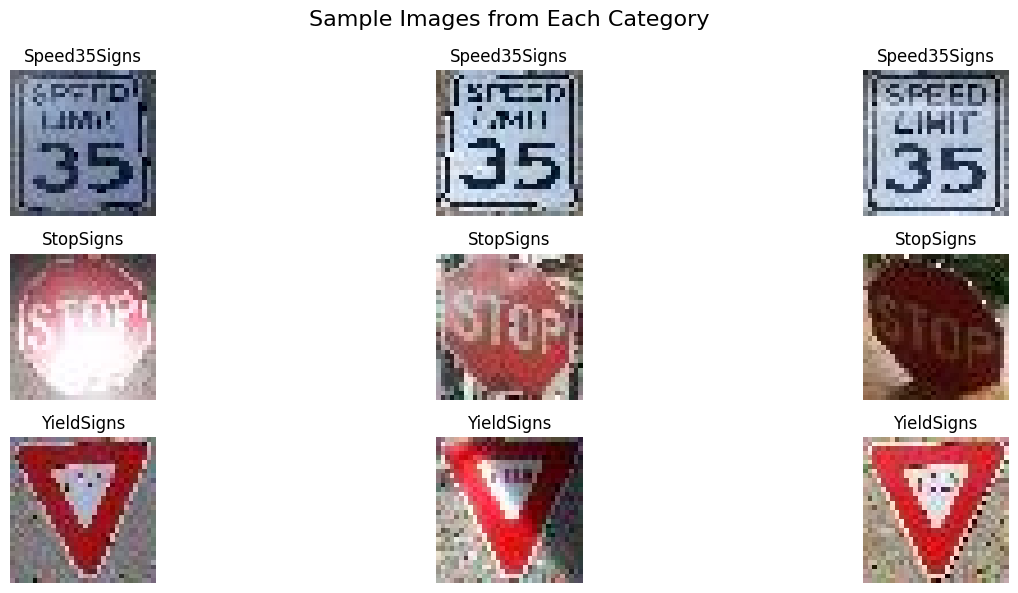

In [ ]:
import random

# Number of images per category to display
num_show = 3

# Plot some sample images
plt.figure(figsize=(15, 6))

for i, (category, folder) in enumerate(clean_folders.items()):
    folder_path = os.path.join(dataset_root, folder)
    if os.path.exists(folder_path):
        image_files = os.listdir(folder_path)
        random.shuffle(image_files)
        for j in range(num_show):
            img_path = os.path.join(folder_path, image_files[j])
            try:
                img = Image.open(img_path)
                plt.subplot(len(clean_folders), num_show, i * num_show + j + 1)
                plt.imshow(img)
                plt.title(f"{category}")
                plt.axis('off')
            except Exception as e:
                print(f"Could not open {img_path}: {e}")

plt.suptitle("Sample Images from Each Category", fontsize=16)
plt.tight_layout()
plt.show()


# 6. Load Dataset Using PyTorch's ImageFolder

In [ ]:
!pip install torchvision

In [ ]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define image transformation: only ToTensor (no normalization)
transform = transforms.ToTensor()

# Load dataset using ImageFolder with simple transform
dataset = datasets.ImageFolder(root=clean_root, transform=transform)

# Split dataset into train (80%) and validation (20%)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

# Create DataLoaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

print("Dataloaders ready (no normalization).")


Dataloaders ready (no normalization).


# 7. Import Dependencies

In [ ]:
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models

# Check device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cpu


# 8. Define & Modify ResNet-18

In [ ]:
class CustomResNet(nn.Module):
    def __init__(self, num_classes=3):
        super(CustomResNet, self).__init__()
        self.model = models.resnet18(weights=None)  # Load ResNet-18 without pretrained weights

        # Modify first layer to accept 32x32 images (instead of 224x224)
        self.model.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False)

        # Remove max pooling (since 32x32 is small)
        self.model.maxpool = nn.Identity()

        # Modify the final fully connected layer for 3 classes
        in_features = self.model.fc.in_features
        self.model.fc = nn.Linear(in_features, num_classes)

    def forward(self, x):
        return self.model(x)

# Instantiate model
model = CustomResNet(num_classes=3).to(device)
print("ResNet-18 model ready.")

ResNet-18 model ready.


# 9. Define Loss & Optimizer

In [ ]:
criterion = nn.CrossEntropyLoss()  # Multi-class classification loss
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)  # Adam optimizer with weight decay

# 10. Train the Model

In [ ]:
num_epochs = 5  # Number of training epochs

for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0
    correct, total = 0, 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_acc = 100 * correct / total
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader):.4f}, Train Acc: {train_acc:.2f}%")

print("Training complete.")

Epoch 1/5, Loss: 0.2651, Train Acc: 90.40%
Epoch 2/5, Loss: 0.0521, Train Acc: 98.44%
Epoch 3/5, Loss: 0.0433, Train Acc: 99.20%
Epoch 4/5, Loss: 0.0600, Train Acc: 97.97%
Epoch 5/5, Loss: 0.0229, Train Acc: 99.39%
Training complete.


# 11. Evaluate the Model

In [ ]:
model.eval()
correct, total = 0, 0

with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

val_acc = 100 * correct / total
print(f"Validation Accuracy: {val_acc:.2f}%")

Validation Accuracy: 99.62%


# 12. Save the Model

In [ ]:
torch.save(model.state_dict(), "resnet18_traffic_signs.pth")
print("Model saved.")

Model saved.


## 13. Adversarial Attack

In [ ]:
!pip install torchattacks


# 14. Compare the original image with FGSM one

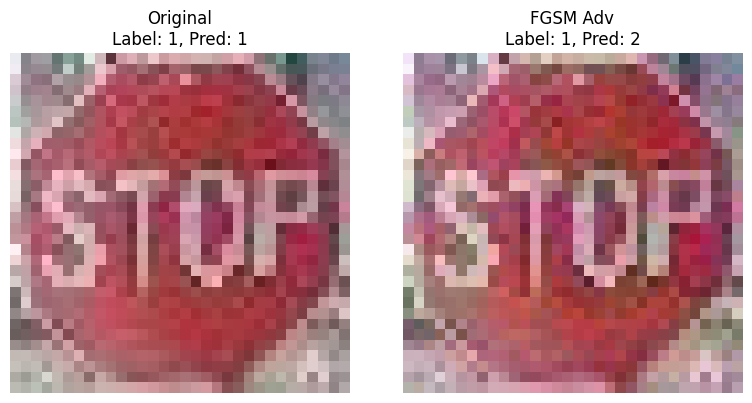

In [ ]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

# -----------------------
# FGSM Attack Function (no normalization)
# -----------------------
def fgsm_attack(model, image, label, epsilon):
    image.retain_grad()

    output = model(image)
    loss = F.cross_entropy(output, label)
    model.zero_grad()
    loss.backward()

    data_grad = image.grad.data
    adv_image = image + epsilon * data_grad.sign()
    adv_image = torch.clamp(adv_image, 0, 1)  # Clamp to [0, 1]

    return adv_image.detach()

# -----------------------
# Load one image (from unnormalized val_loader)
# -----------------------
images, labels = next(iter(val_loader))
image = images[1].unsqueeze(0).clone().detach().to(device)
label = labels[1].unsqueeze(0).clone().detach().to(device)
image.requires_grad = True

# -----------------------
# FGSM Attack
# -----------------------
epsilon = 8 / 255
adv_image = fgsm_attack(model, image, label, epsilon)

# -----------------------
# Get predictions
# -----------------------
model.eval()
with torch.no_grad():
    pred_clean = model(image).argmax(dim=1).item()
    pred_adv = model(adv_image).argmax(dim=1).item()

# -----------------------
# Visualization
# -----------------------
image_vis = image.squeeze().detach().cpu()
adv_vis = adv_image.squeeze().detach().cpu()

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(image_vis.permute(1, 2, 0).numpy())
plt.title(f"Original\nLabel: {label.item()}, Pred: {pred_clean}")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(adv_vis.permute(1, 2, 0).numpy())
plt.title(f"FGSM Adv\nLabel: {label.item()}, Pred: {pred_adv}")
plt.axis('off')

plt.tight_layout()
plt.show()


# 15. Compare the original accuracy with FGSM

In [ ]:
import torchattacks
model.eval()
fgsm_attack = torchattacks.FGSM(model, eps=8/255)

correct_clean, correct_fgsm, total = 0, 0, 0

for images, labels in val_loader:
    images, labels = images.to(device), labels.to(device)

    # Clean prediction
    with torch.no_grad():
        outputs_clean = model(images)
        _, preds_clean = torch.max(outputs_clean, 1)

    # Generate adversarial examples (requires grad)
    adv_images = fgsm_attack(images, labels)

    # FGSM prediction
    with torch.no_grad():
        outputs_fgsm = model(adv_images)
        _, preds_fgsm = torch.max(outputs_fgsm, 1)

    # Count accuracy
    correct_clean += (preds_clean == labels).sum().item()
    correct_fgsm += (preds_fgsm == labels).sum().item()
    total += labels.size(0)

# Final accuracy printout
val_acc_clean = 100 * correct_clean / total
val_acc_fgsm = 100 * correct_fgsm / total

print(f"✅ Clean Accuracy on full val set: {val_acc_clean:.2f}%")
print(f"⚠️  FGSM Accuracy on full val set : {val_acc_fgsm:.2f}%")


✅ Clean Accuracy on full val set: 99.62%
⚠️  FGSM Accuracy on full val set : 61.44%


In [ ]:
!zip -r /content/LisaCnn.zip /content/LisaCnn

Streaming output truncated to the last 5000 lines.
  adding: content/LisaCnn/LisaCnn/StopSigns/LisaAdvStop/AdvStop/R20200518_190010.jpg (deflated 15%)
  adding: content/LisaCnn/LisaCnn/StopSigns/LisaAdvStop/AdvStop/R20200518_190033.jpg (deflated 13%)
  adding: content/LisaCnn/LisaCnn/StopSigns/LisaAdvStop/AdvStop/R20200515_154809.jpg (deflated 14%)
  adding: content/LisaCnn/LisaCnn/StopSigns/LisaAdvStop/AdvStop/R20200516_191456.jpg (deflated 14%)
  adding: content/LisaCnn/LisaCnn/StopSigns/LisaAdvStop/AdvStop/R20200523_120822.jpg (deflated 23%)
  adding: content/LisaCnn/LisaCnn/StopSigns/LisaAdvStop/AdvStop/R20200523_121401.jpg (deflated 14%)
  adding: content/LisaCnn/LisaCnn/StopSigns/LisaAdvStop/AdvStop/R20200523_120451.jpg (deflated 15%)
  adding: content/LisaCnn/LisaCnn/StopSigns/LisaAdvStop/AdvStop/R20200523_105312.jpg (deflated 14%)
  adding: content/LisaCnn/LisaCnn/StopSigns/LisaAdvStop/AdvStop/R20200518_144957.jpg (deflated 13%)
  adding: content/LisaCnn/LisaCnn/StopSigns/LisaA